In [1]:
# @hidden_cell
# import some libraries
import numpy as np                # for vector, matrix etc data structures and manipulations
import matplotlib.pyplot as plt   # for plotting
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax


# The History of Quantum Mechanics

## Motivation

At the end of the 19th century, it was widely believed that classical physics could explain all phenomena.  There were a few observations, however, that had yet to receive an adequate explanation in classical physics.  These included blackbody radiation, the photoelectric effect, the heat capacity of some solids at low temperature and the atomic spectra (specifically the hydrogen atom spectrum).  Physicists such as Max Planck, Albert Einstein, and Niels Bohr introduced the idea of quantizing energies and other quantities to explain the experimental data of these phenomena.  Following this, physicists such as Werner Heisenberg, Max Born and Erwin Schrodinger developed the quantum mechanics formalism that we use today.

## Learning Objectives

After working through this notebook, you will be able to:

1. Describe the blackbody catastrophe
2. Describe the photoelectric effect
3. Describe an Einstein solid
4. Desribe the hydrogen atom spectrum

## Coding Concepts

The following coding concepts are employed in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Blackbody catastrophe

![title](img/600px-Black_body.png)

Light radiating from a "blackbody," a source that emits over a large wavelength span, has a measured spectral radiance given above.  These spectra are temperature dependent.  The spectra cannot be explained using classical physics.  The classical solution was derived by Lord Rayleigh and J. H. Jeans and is given by

$B(\lambda,T) = \frac{2ck_BT}{\lambda^4}, \tag{1}$

where $c$ is the speed of light, $\lambda$ is the wavelength, $k_B$ is Boltzmann's constant and $T$ is temperature.  This function is labeled as the "classical" curve in the plot above for $T=5000$ K.  As we can see, it clearly does not agree with the blue curve also at 5000 K.

This was perplexing to the physicists at the time and no theory was able to explain this until Max Planck made the assumption that the energy levels were discrete (rather than contiunous).  This lead to an expression for the spectral distribution function of:

$B(\lambda,T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}. \tag{2}$

The only new term in this expression is $h$ which is termed Planck's constant.  The value of this constant was unknown at the time but was the only unknown in the above equation so could be fit to experimental data for a particular temperature.  Doing this, Planck arrived at a value of $h = 6.626 \times 10^{-34}$ J$\cdot$s.

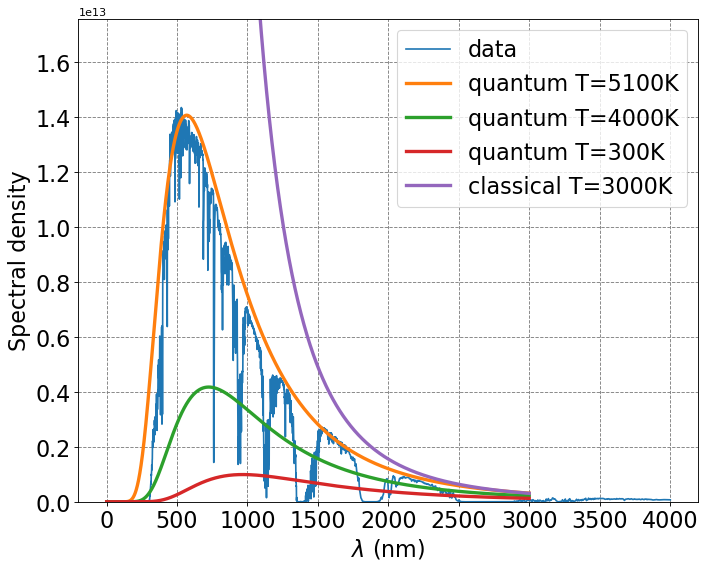

In [3]:
h = 6.626E-34  # J*s
c = 3.0E8      # m/s
kB = 1.380E-23 # J/K
nm_to_m = 1.0E-9 # convert nm to m

solar = np.loadtxt("solarspectrum_nrel.txt",skiprows=1)

# classical spectral distribution function
def classicalB(x,T):
    return 2*c*kB*T/(x*nm_to_m)**4

# quantum spectral distribution function
def quantumB(x,T):
    return 2*h*c**2/(x*nm_to_m)**5/(np.exp(h*c/(x*nm_to_m*kB*T))-1)

# initialize a figure
ax = define_figure(xlabel="$\lambda$ (nm)",ylabel="Spectral density")
# make an array containing domain of wavelengths to consider
x = np.arange(1.0,3000,1)
plt.ylim((0.0,np.amax(quantumB(x,5100))*1.25))
ax.plot(solar[:,0],solar[:,3]*1E13,label="data")
# plot quantum result
ax.plot(x,quantumB(x,5100),label="quantum T=5100K",lw=3)
ax.plot(x,quantumB(x,4000),label="quantum T=4000K",lw=3)
ax.plot(x,quantumB(x,3000),label="quantum T=300K",lw=3)
# plot classical result
ax.plot(x,classicalB(x,3000),label="classical T=3000K",lw=3)
# make legend
ax.legend(fontsize=20,markerscale=5.0);

## Photoelectric effect

Despite the success of Planck's model for the blackbody radiation, the idea the energy is quantized in certain situations was not generally accepted.  Around 1887, a german physicist by the name of Heinrich Hertz discovered what is now called the photoelectric effect: shining ultraviolet light at a metallic surface causes electrons to be emitted from the surface.  Two observations made during this experiment were in contrast with classical theory.  Namely that the energy of the emitted electrons is independent of the intensity of the incident light and that there is a threshold frquency of incident light below which no electrons are ejected from the surface.  These results could not be explained by classical mechanics.  Albert Einstein attempted to explain this phenomenon by first quantizing the energy levels of the electrons similar to what Planck did:

$ E = nh\nu. \tag{3} $

Einstein took this one step further and suggested that the light energy emitted was also quantized packets of energy, now known as photons (Planck assumed the emitted light was a classical wave).  These suggests lead to the conclusion that the kinetic energy of emitted light will have the following form:

$KE = h\nu - h\nu_0. \tag{4}$

This result was able to explain the experiment.  The above equation demonstrates that the kinetic energy of the emitted electron will be equal to the energy (not intensity) of the incident light minus a threshold energy which is also called a work function.  

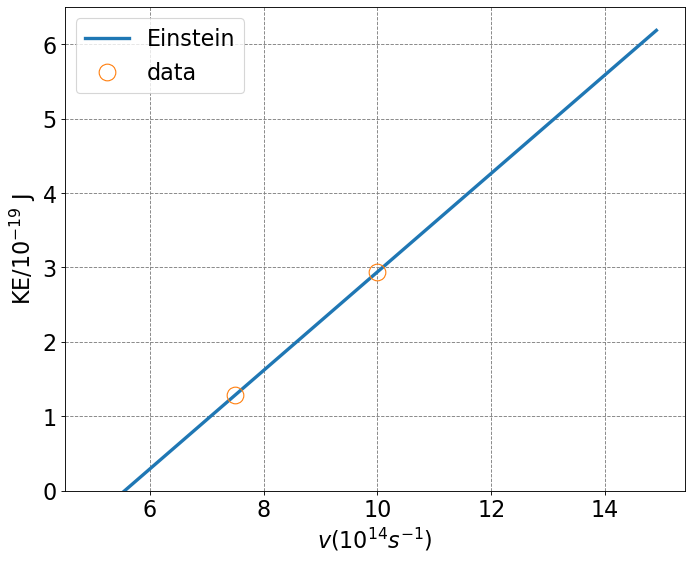

In [4]:
# Photoelectric effect for Lithium
h = 6.626e-1  # converted unites
c = 3.0E8      # m/s

v0 = 5.564 # E14 for Lithium

# quantum spectral distribution function
def photoelectric(x):
    return h*x - h*v0

# initialize a figure
ax = define_figure(xlabel='$ v (10^{14}s^{-1})$',ylabel="KE$/10^{-19}$ J")
# make an array containing domain of wavelengths to consider
x = np.arange(5.0,15,0.1)
plt.ylim((0.0,np.amax(photoelectric(x))*1.05))
# plot quantum result
ax.plot(x,photoelectric(x),label="Einstein",lw=3)
xdata = [c/300E-9*1E-14,c/400E-9*1E-14]
ydata = [2.935,1.280]
ax.plot(xdata,ydata,'o',markersize=15,mfc='none',label='data')
ax.plot()
# make legend
ax.legend(fontsize=20,markerscale=1.0);

## Einstein Solid

The classical result for the heat capacity of a solid at constant volume is $3R$.  This is the Dulong and Petit law.  This suggest that the heat capacity of a solid is independent of temperature.  This was found to be incorrect experimentally and again serve as an embarassment for classical physics.  Two years after his work on the photoelectric effect, Einstein explained the heat capacity of a solid by quantizing the vibrational energy levels.  This was the first time that the energy of anything other than an electron had been quantized.  After quantizing the vibrational energy levels, the heat capacity of a solid can be derived as (left for Statistical Mechanics):

$C_V = 3Nk_B\left(\frac{\epsilon}{2k_B T}\right)^2\frac{1}{\sinh^2\left( \frac{\epsilon}{2k_B T} \right)} \tag{5}$

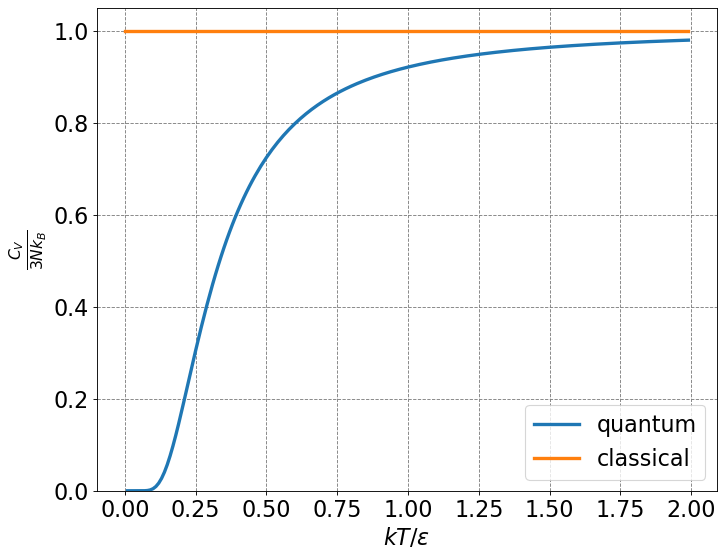

In [5]:
# classical spectral distribution function
def classicalCv(T):
    return np.ones(len(T))

# quantum spectral distribution function
def quantumCv(T):
    return (1.0/T)**2 * np.exp(1.0/T)/(np.exp(1.0/T)-1)**2

# make an array containing domain of wavelengths to consider
x = np.arange(0,2,0.01)
# setup plot parameters
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$kT/\epsilon$',size=20)
ax.set_ylabel(r'$\frac{C_V}{3Nk_B}$',size=20)
plt.tick_params(axis='both',labelsize=20)
plt.ylim((0.0,1.05))
# plot quantum result
ax.plot(x,quantumCv(x),label="quantum",lw=3)
# plot classical result
ax.plot(x,classicalCv(x),label="classical",lw=3)
# make legend
ax.legend(fontsize=20,markerscale=5.0);

## Hydrogen Atom Spectrum

![hatom](img/spectrumwav.gif)

When heated or subjected to electrical discharge, atoms emit radiation of characteristic frequencies.  The spectrum from each atom is unique.  These discrete emitted frequencies comprise a stick spectrum such as the one shown above.  

These stick spectra are clearly impossible to describe with classical mechanics.  In 1885, Johann Blamer demonstrated that a subset of the hydrogen atom spectrum (the Balmer series) could be described by the equation
\begin{equation}
v = 8.2202\times10^{14}\left(1-\frac{4}{n^2}\right),
\end{equation}
where $n=3,4,5,...$.  Later, Johannes Rydberg generalized this formula to account for the entire hydrogen atom spectrum yielding the Rydberg formula
\begin{equation}
\tilde{v} = R_H\left(\frac{1}{n_1^2}-\frac{1}{n_2^2}\right),
\end{equation}
where $R_H = 109677.581$ cm$^{-1}$ is the Rydberg constant, $n_1 = 1,2,3,...$, and $n_2 = n_1+1,n_1+2,...$.  

While these equations fit the hydrogen atom spectrum nicely, they do not prescribe any physics to the system.  They do not present a model of the hydrogen atom but rather a heuristic equation that fits the data.  Nonetheless, scientists were perplexed by the presence of the integers $n_1$ and $n_2$. 

In 1911, Niels Bohr proposed a model for the hydrogen atom that was able to recapitulate the hydrogen atom spectrum.

The model consists of an electron orbiting a proton in circular orbits.  The proton is considered to be fixed in space because it is so much more massive than the electron.  Bohr assumed that the electron demonstrates wavelike characteristics and that these waves must have an integer number of modes around the circular orbit.  This equates to
\begin{equation}
2\pi r = n\lambda_e \quad n=1,2,3,...
\end{equation}
where $\lambda_e$ is the deBroglie wavelength of an electron and can be written as
\begin{equation}
\lambda_e = \frac{h}{m_ev}.
\end{equation}
Plugging the deBroglie wavelength equation into the circular wave equation yields
\begin{equation}
m_evr = \frac{nh}{2\pi} = n\hbar,
\end{equation}
where we have introduce $\hbar = \frac{h}{2\pi}$ as a short-hand because it comes up frequently in quantum mechanics. The term on the left-hand side of the last equation, $m_evr$, is the angular momentum of the electron.  Thus Bohr 's model demonstrates a quantization of the angular momentum of the electron.

Bohr posited that for stationary states of the electron the electrostatic force between the proton and electron,
\begin{equation}
f = \frac{e^2}{4\pi\varepsilon_0r^2}
\end{equation}
where $4\pi\varepsilon_0$ is present to achieve SI units, must be equal to the centrifugal force,
\begin{equation}
f = \frac{m_ev^2}{r}
\end{equation}
where $m_e$ is the mass and $v$ is the velocity of the electron.  Equating these two forces yields
\begin{equation}
\frac{e^2}{4\pi\varepsilon_0r^2} = \frac{m_ev^2}{r}.
\end{equation}


The combination of the force balance equation and the quantized angular momentum equation quantizes the values of $r$, the radius of the electron's circular orbit, that can be taken.  To demonstrate this we solve the quantized angular momentum equation for $v$ and plug the result into the force balance equation and solve for $r$:
\begin{align}
\frac{e^2}{4\pi\varepsilon_0r^2} &= \frac{m_e\left( \frac{n\hbar}{m_er}\right)^2}{r} \\
\Rightarrow \frac{e^2}{4\pi\varepsilon_0} &= \frac{(n\hbar)^2}{m_er} \\
\Rightarrow e^2m_er &= 4\pi\varepsilon_0(n\hbar)^2 \\
\Rightarrow r &= \frac{4\pi\varepsilon_0(n\hbar)^2}{e^2m_e} \quad n=1,2,3,...
\end{align}
The radius of the first Bohr orbit is denoted $a_0 = \frac{4\pi\varepsilon_0\hbar^2}{e^2m_e}$ or units of Bohr.  Allowed values of $r$ as a function of $n$ are plotted below.

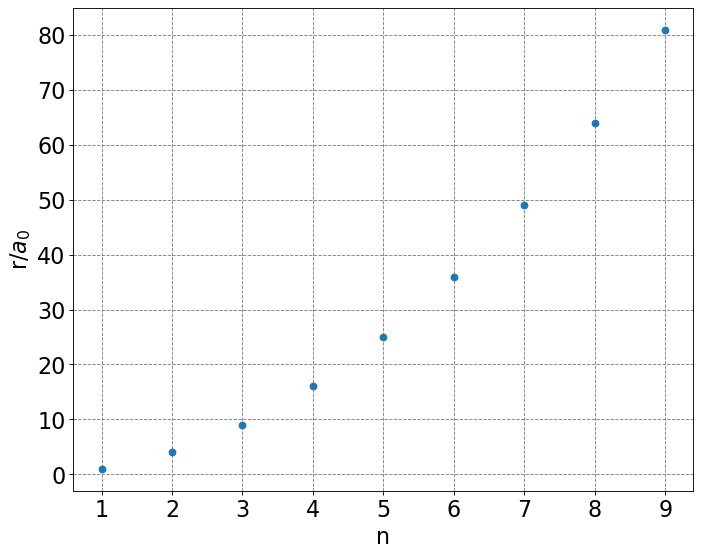

In [6]:
# classical spectral distribution function
def hydrogen_r(n):
    return n*n

# make an array containing domain of wavelengths to consider
n = np.arange(1,10,1)
# setup plot parameters
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel('n',size=20)
ax.set_ylabel(r'r/$a_0$',size=20)
plt.tick_params(axis='both',labelsize=20)
# plot quantum result
ax.plot(n,hydrogen_r(n),'o');

The energy of the system can is a sum of the Coulomb attraction between the electron and the proton and the kinetic energy of the electron:
\begin{equation}
E(r) = \frac{1}{2}m_ev^2 - \frac{e^2}{4\pi\varepsilon_0r}
\end{equation}

To determine the energy of an electron that is limited to be in the circular wavelike orbits described above, we must use the force balance relationship.  We do that by substituting $m_ev^2 = \frac{e^2}{4\pi\varepsilon_0r}$ into the energy equation to yield
\begin{align}
E(r) &= \frac{1}{2}\frac{e^2}{4\pi\varepsilon_0r} - \frac{e^2}{4\pi\varepsilon_0r} \\
    &= -\frac{1}{2}\frac{e^2}{4\pi\varepsilon_0r} \\
    &= -\frac{1}{2}\frac{e^2}{4\pi\varepsilon_0}\frac{e^2m_e}{4\pi\varepsilon_0(n\hbar)^2} \\
    &= -\frac{m_ee^4}{32\pi^2\varepsilon_0\hbar^2}\frac{1}{n^2} \\
    &= -\frac{m_ee^4}{8\varepsilon_0^2h^2}\frac{1}{n^2} \quad n=1,2,3,...
\end{align}
where I plugged in the quantized values for $r$ derived from the for balance relationship.  

Taking differences in energy between two energy levels, $n_1$ and $n_2>n_1$, yields
\begin{equation}
\Delta E = \frac{m_ee^4}{8\varepsilon_0^2h^2}\left(\frac{1}{n_1^2} - \frac{1}{n_2^2}\right)
\end{equation}
Equating this to the frequency (use $E = h\nu$ and $\tilde{\nu} = \frac{\nu}{c}$) of emitted light yields
\begin{equation}
\tilde{v} = \frac{m_ee^4}{8\varepsilon_0^2ch^3}\left(\frac{1}{n_1^2} - \frac{1}{n_2^2}\right)
\end{equation}

We see that this yields an expression for the Rydberg constant in terms of fundamental constants
\begin{equation}
R_H = \frac{m_ee^4}{8\varepsilon_0^2ch^3}
\end{equation}

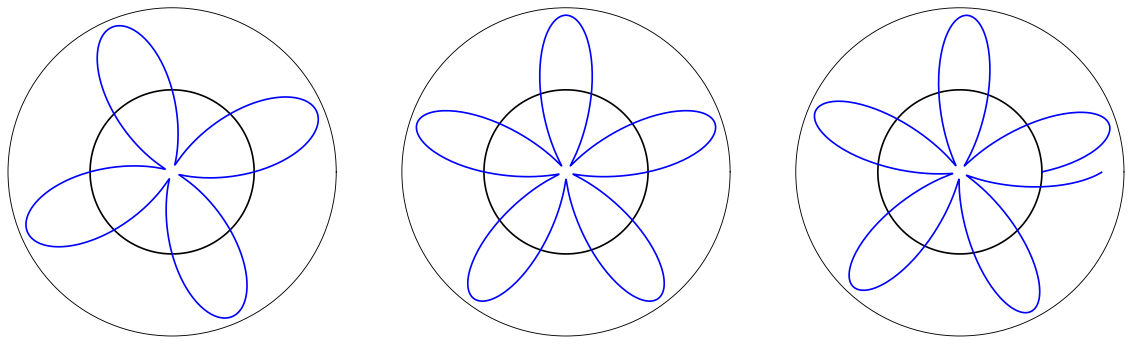

In [7]:
# make an array containing domain of wavelengths to consider
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
theta = np.arange(0,2*np.pi,0.01)
# setup plot parameters
fig, ax  = plt.subplots(1,3,subplot_kw={'projection': 'polar'},figsize=(18,6), dpi= 80)
n = np.array([4,5,5.15])
for i in range(3):
    ax[i].plot(theta,np.ones(theta.size),c='k')
    ax[i].grid(False)
    ax[i].set_rticks([]);
    ax[i].set_thetagrids([])
    ax[i].set_rmax(2)
    ax[i].plot(theta,np.ones(theta.size) + 0.0001*np.sin(n[i]*theta),c='b')
#ax.plot(x,np.sqrt(1-x**2),label="quantum",lw=1,c='k')
#ax.plot(x,-np.sqrt(1-x**2),label="quantum",lw=1,c='k')